# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Se redujo el tamaño del conjunto para que los cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando se hicieron los cambios.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos. <br>
A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`instacart_orders.csv`, `products.csv`, `aisles.csv`, `departments.csv` y `order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Se verifica la información para cada DataFrame creado.


In [ ]:
# importar librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Extraer la informacion de los archivos .csv
df_instacart_orders = pd.read_csv('instacart_orders.csv', sep= ';')
df_products = pd.read_csv('products.csv', sep= ';')
df_aisles = pd.read_csv('aisles.csv', sep= ';')
df_departments = pd.read_csv('departments.csv', sep= ';')
df_order_products = pd.read_csv('order_products.csv', sep= ';')

In [ ]:
# Mostrar la informacion contenida en el archivo "orders", y mostrar la suma de los datos nulos
df_instacart_orders.info()
print()
df_instacart_orders.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB



order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

In [ ]:
# Mostrar la informacion contenida en el archivo "products", y mostrar la suma de los datos nulos
df_products.info()
print()
df_products.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB



product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [ ]:
# Mostrar la informacion contenida en el archivo "aisles", y mostrar la suma de los datos nulos
df_aisles.info()
print()
df_aisles.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB



aisle_id    0
aisle       0
dtype: int64

In [ ]:
# Mostrar la informacion contenida en el archivo "departments", y mostrar la suma de los datos nulos
df_departments.info()
print()
df_departments.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes



department_id    0
department       0
dtype: int64

In [ ]:
# Mostrar la informacion contenida en el archivo "products", y mostrar la suma de los datos nulos
df_order_products.info(show_counts=True)
print()
df_order_products.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB



order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

## Conclusiones

Como conclusión, a primera vista (antes de mostrar la informacion con .info()), parecia todo ir bien, despues de mostrar la info del primer dataset (df_instacart_orders), note que los archivos.csv se encontraban separados por (;), y no por comas como usualmente seria en este tipo de formatos. <br>
Despues se verificó la informacion de los otros datasets y note que, era la misma situacion para todos los datasets. <br>
Procedi a importar los datasets con el separador (;) y al mostrar la info, las columnas se mostraron de manera correcta. <br>
<br>
Analizando la informacion de cada dataset: <br>
- df_instacart_orders: los datos en la columna son de tipo int64, excepto la columna "days_since_prior_order", por contar con valores nulos
- df_products: columna "product_name" es la unica que cuenta con valores nulos, y tipo de datos object, el resto de columnas int64
- df_aisles: cuenta con sus columnas con datos completos. Tipos de datos object e int64
- df_departments: cuenta con sus columnas con datos completos. Tipos de datos object e int64
- df_order_products: columna "add_to_cart_order" cuenta con valores nulos, tipo de dato float64, resto de columnas con datos completos y tipo de dato int64. 


# Paso 2. Preprocesamiento de los datos

Preprocesamiento de los datos de la siguiente manera:

- Verificación y corrección de los tipos de datos
- Identificación de los valores ausentes.
- Identificación y eliminación de los valores duplicados.


## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [ ]:
# Revisa si hay pedidos duplicados
duplicados_totales = df_instacart_orders.duplicated().sum()
print(f"las filas duplicadas son: {duplicados_totales}")
print()

# Ahora, revisando las filas de duplicados totales: 
print(df_instacart_orders[df_instacart_orders.duplicated()])

las filas duplicadas son: 15

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   18

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Si existen lineas duplicadas, en total son 15. <br>
Haciendo un print de las lineas, veo un comun denominador en 2 columnas <br>
- order_dow: 3, siendo 0 (segun la descripcion) domingo. Por lo que, el numero repetido en todas las filas duplicadas es "miercoles"
- order_hour_of_day: 2, siguiendo el patron de 24hrs, partimos de 0 (medianoche), por lo que seria "2am"

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
pedidos_miercoles_2am = df_instacart_orders[
    (df_instacart_orders['order_dow'] == 3) &
    (df_instacart_orders['order_hour_of_day'] == 2)
]

# print(pedidos_miercoles_2am.head(10))
# print(pedidos_miercoles_2am.tail(10))
print(pedidos_miercoles_2am.sample(10))

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
245787    819551    29545            15          3                  2   
323723   1833869   128530            14          3                  2   
284038   2845099    31189            11          3                  2   
458816    910166   164782            18          3                  2   
400167    774488    66195            16          3                  2   
266232   1782114   106752             1          3                  2   
74991     592699   175625             2          3                  2   
230807   1918001   188546            14          3                  2   
215294   2160484   107525            16          3                  2   
48024    1453300    69262            27          3                  2   

        days_since_prior_order  
245787                     4.0  
323723                    17.0  
284038                     7.0  
458816                     4.0  
400167                     2.0 

¿Qué sugiere este resultado? <br>
Sugiere que en efecto, las filas duplicadas realmente son datos duplicados que no aportan valor a la tabla, por lo que valdria la pena eliminarlos para tener informacion de los datos del dataset mas adecuados. 

In [10]:
# Elimina los pedidos duplicados
print('numero de filas duplicadas de inicio: ', df_instacart_orders.duplicated().sum())
df_instacart_orders = df_instacart_orders.drop_duplicates()
df_instacart_orders.reset_index(drop=True)

numero de filas duplicadas de inicio:  15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478947,3210681,5617,5,1,14,7.0
478948,3270802,112087,2,3,13,6.0
478949,885349,82944,16,2,11,6.0
478950,216274,4391,3,3,8,8.0


In [11]:
# Vuelve a verificar si hay filas duplicadas
print('numero de filas duplicadas al final: ', df_instacart_orders.duplicated().sum())

numero de filas duplicadas al final:  0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print('numero de datos duplicados en la columna "order_id": ', df_instacart_orders['order_id'].duplicated().sum())

numero de datos duplicados en la columna "order_id":  0


Descripcion de los hallazgos: <br>
<br>
De acuerdo al dataset (instacart_orders.csv) y a la descripcion de las columnas, el "order_id" debe ser un numero de orden de compra unico, por lo que cualquier dato duplicado sobre dicha columna supone de entrada un valor incorrecto. <br>
<br>
Primeramente, procedi a utilizar el metodo .duplicates.sum() identifique 15 filas de valores duplicados, viendo como patron que, en 2 columnas "order_dow": 3, supone es "miercoles", y "order_hour_of_day": 2, supone es "2am". <br>
Procedi a realizar el drop_duplicates y reasignarlo al dataframe, logre eliminar de manera efectiva las filas duplicadas que no aportaban valor alguno a la tabla, y que sin detectarlos, harian que calculos posteriores se generaran de manera incorrecta. <br>
Finalmente, imprimi la columna "order_id" del dataset corregido, y tambien el dataset completo corregido para verificar que no existen dichos valores duplicados que no aportaban valor a la tabla. 

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print('la cantidad de filas totalmente duplicadas son: ', df_products.duplicated().sum())

la cantidad de filas totalmente duplicadas son:  0


In [14]:
# Revisa únicamente si hay ID de productos duplicados
print('la cantidad de datos duplicados en "product_id" son: ', df_products['product_id'].duplicated().sum())

# print(df_products['product_id'].head(5))

la cantidad de datos duplicados en "product_id" son:  0


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name_uppercase'] = df_products['product_name'].str.upper()
duplicate_names = df_products['product_name_uppercase'].duplicated().sum()

# null_names = df_products['product_name'].isnull().sum()
# print('la cantidad de nombres de producto nulos son: ', null_names)
# print()
print('la cantidad de nombres de producto duplicados son: ', duplicate_names)

la cantidad de nombres de producto duplicados son:  1361


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
# Paso 1: Filtrar solo los nombres no faltantes
products_with_name = df_products[df_products['product_name'].notna()]
print(f"la cantidad de productos con nombre es: {len(products_with_name)}")

# Paso 2: Convertir a mayúsculas para mejor comparación
products_with_name_upper = products_with_name['product_name'].str.upper()

# Paso 3: Buscar duplicados
duplicate_with_names = products_with_name_upper.duplicated().sum()
print('la cantidad de nombres duplicados en productos no faltantes es: ', duplicate_with_names)

la cantidad de productos con nombre es: 48436
la cantidad de nombres duplicados en productos no faltantes es:  104


Descripcion breve de los hallazgos <br>
<br>
Al analizar el dataset "products.csv", primeramente verifique si existian o no (en este caso no), filas duplicadas en este dataset. <br>
Procedi a verificar en la columna "product_id" donde no se encontro algun valor duplicado. Para el caso de la columna "product_name" podrian estar ocultos duplicados implicitos, para trabajarlos comence convirtiendo los nombres a letras mayusculas para mejor comparacion. 
Al final, esto fue lo que encontre para la columna "product_id": <br>
<br>
la cantidad de nombres de producto duplicados son:  1361 <br>
la cantidad de nombres de producto nulos son:  1258 <br>
la cantidad de productos con nombre es: 48436 <br>
la cantidad de nombres duplicados en productos no faltantes es: 104

Finalmente, lo que encontre fue, que existen nombres de producto nulos, y con ayuda de la correccion de posibles duplicados implicitos mediante el cambio de nombre a mayusculas, la cantidad de nombres duplicados en productos con nombre es de solo 104. Para asi, seguir con la exploracion de los datos. 

### `departments` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas
print('la cantidad de filas totalmente duplicadas son: ', df_departments.duplicated().sum())

la cantidad de filas totalmente duplicadas son:  0


In [18]:
# Revisa únicamente si hay IDs duplicadas de departamentos
print('la cantidad de IDs duplicados de departamentos son: ', df_departments['department_id'].duplicated().sum())

la cantidad de IDs duplicados de departamentos son:  0


Descripcion breve de los hallazgos <br>
<br>
Haciendo un check, tanto de filas completas, como de IDs, pude verificar que no existen datos duplicados. En el caso de la columna "department_id", al ser su caracteristica un valor unico no permite que existan valores duplicados. Por lo que, si no existen valores duplicados en dicha columna, por ende, no deberian existir filas duplicadas. 

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print('la cantidad de filas totalmente duplicadas son: ', df_aisles.duplicated().sum())

la cantidad de filas totalmente duplicadas son:  0


In [20]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print('la cantidad de IDs duplicados en pasillos son: ', df_aisles['aisle_id'].duplicated().sum())

la cantidad de IDs duplicados en pasillos son:  0


Descripcion breve de los hallazgos <br>
<br>
Haciendo un check, tanto de filas completas, como de IDs, pude verificar que no existen datos duplicados. En el caso de la columna "aisle_id", al ser su caracteristica un valor unico no permite que existan valores duplicados. Por lo que, si no existen valores duplicados en dicha columna, por ende, no deberian existir filas duplicadas. 

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print('la cantidad de filas totalmente duplicadas son: ', df_order_products.duplicated().sum())

la cantidad de filas totalmente duplicadas son:  0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
# Aqui verificamos duplicados combinando las columnas "add_to_cart_order" y "order_id"
duplicates_cart_orderid = df_order_products.duplicated(subset=['add_to_cart_order', 'order_id']).sum()
print('la cantidad de duplicados combinando columnas "add_to_cart_order" y "order_id" es: ', duplicates_cart_orderid)
print()

# Aqui verificamos duplicados combinando las columnas "product_id" y "order_id"
# duplicates_cart_orderid = df_order_products.duplicated(subset=['product_id', 'order_id']).sum()
# print('la cantidad de duplicados combinando columnas "product_id" y "order_id" es: ', duplicates_cart_orderid)

# Aqui verificamos duplicados combinando columnas "order_id" y "product_id" y "reordered" 
# duplicates_columns = df_order_products.duplicated(subset=['reordered', 'order_id', 'product_id']).sum()
# print('la cantidad de duplicados combinando columnas "reordered", "order_id" y "product_id" es: ', duplicates_columns)

# Aqui verificamos duplicados combinando columnas "order_id", "product_id" y "add_to_cart_order"
duplicates_order_product_cart = df_order_products.duplicated(subset=['order_id', 'product_id', 'add_to_cart_order']).sum()
print('la cantidad de duplicados combinando columnas "order_id", "product_id" y "add_to_cart_order" es ', duplicates_order_product_cart)

la cantidad de duplicados combinando columnas "add_to_cart_order" y "order_id" es:  766

la cantidad de duplicados combinando columnas "order_id", "product_id" y "add_to_cart_order" es  0


Descripcion breve de los hallazgos <br>
<br>
Comenzamos por el inicio, revisando si existen filas totalmente duplicadas, y verificamos que no existen filas totalmente duplicadas. <br>
Para verificar cualquier tipo de dato engañoso, comence haciendo una combinacion entre el numero de pedido unico "order_id" y el orden secuencial "add_to_cart_order". Para mi de entrada era buen comienzo, dado que este cruce significa que dentro del mismo pedido unico, cada producto agregado al carrito deberia tener un numero de secuencia unico. <br>
Explorando mas el analisis, conclui que valia la pena agregar la columna "product_id" a la combinacion, que me ayudaria a entender, si dentro del mismo pedido, existe el mismo producto ordenado secuencialmente en el mismo numero o no.


## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
product_name_null = df_products[df_products['product_name'].isnull()]
print("Productos sin nombre son:", len(product_name_null))
print()
print(product_name_null.sample(15))
# print(product_name_null.head(15))
# print(product_name_null.tail(15))

Productos sin nombre son: 1258

       product_id product_name  aisle_id  department_id product_name_uppercase
14231       14232          NaN       100             21                    NaN
42655       42656          NaN       100             21                    NaN
31052       31053          NaN       100             21                    NaN
32994       32995          NaN       100             21                    NaN
39222       39223          NaN       100             21                    NaN
14639       14640          NaN       100             21                    NaN
14979       14980          NaN       100             21                    NaN
25620       25621          NaN       100             21                    NaN
17830       17831          NaN       100             21                    NaN
30051       30052          NaN       100             21                    NaN
25376       25377          NaN       100             21                    NaN
5264         5265   

Descripcion breve de los hallazgos <br>
<br>
Mis comentarios: primero verifique el total de datos nulos en la columna "product_name". <br>
Explorando los datos de los datos nulos, veo que hay un patron entre "aisle_id" = 100, y "department_id" = 21 <br>
Eche un vistazo a las primeras filas (head), las ultimas (tail), y aleatoriamente (sample). Para todos los casos el patron se repitio. 

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
product_name_null_aisle_100 = product_name_null[product_name_null['aisle_id'] == 100]
all_aisle_100 = (product_name_null['aisle_id'] == 100).all()
print(f"¿Todos los productos sin nombre están en el pasillo 100? {all_aisle_100}")

¿Todos los productos sin nombre están en el pasillo 100? True


Descripcion breve de los hallazgos <br>
<br>
hice un filtrado de la columna "aisle_id" con valor 100. Despues una linea que devolviera un True/False si los productos sin nombre pertenecen al pasillo 100. En este caso es True

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
product_name_null_department_21 = product_name_null[product_name_null['department_id'] == 21]
all_department_21 = (product_name_null['department_id'] == 21).all()
print(f"¿Todos los productos sin nombre están en el departamento 21? {all_department_21}")

¿Todos los productos sin nombre están en el departamento 21? True


Descripcion breve de los hallazgos <br>
<br>
Se realizo un filtrado de la columna "department_id" con valor 21. Despues una linea que devolviera un True/False si los productos sin nombre pertenecen al departamento 21. En este caso es True

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
tables_department_aisle = df_products[(df_products['aisle_id'] == 100) & (df_products['department_id'] == 21)]
print(tables_department_aisle.head())

     product_id product_name  aisle_id  department_id product_name_uppercase
37           38          NaN       100             21                    NaN
71           72          NaN       100             21                    NaN
109         110          NaN       100             21                    NaN
296         297          NaN       100             21                    NaN
416         417          NaN       100             21                    NaN


Descripcion breve de los hallazgos <br>
<br>
Revisando la lista, pudieran tratarse de pasillos y/o departamentos no existentes, dado que ninguna fila contiene informacion en "product_name". O simplemente, para ese pasillo y/o departamento, no existe informacion de "product_name"

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'].fillna('Unknown', inplace=True)

Describe brevemente tus hallazgos y lo que hiciste con ellos.
Aqui solamente utilice el metodo .fillna() para reemplazar los valores nulos de la columna "product_name"

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
print(df_instacart_orders.isnull().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
order_name_null = df_instacart_orders[df_instacart_orders['days_since_prior_order'].isnull()]
print(order_name_null.head(10))

     order_id  user_id  order_number  order_dow  order_hour_of_day  \
28     133707   182261             1          3                 10   
96     787445    25685             1          6                 18   
100    294410   111449             1          0                 19   
103   2869915   123958             1          4                 16   
104   2521921    42286             1          3                 18   
111   2651928   142920             1          0                 14   
118    174214   148907             1          1                  8   
147   2439694    99710             1          6                 10   
157   1330993   138895             1          4                  6   
158   2835610   195350             1          6                 19   

     days_since_prior_order  
28                      NaN  
96                      NaN  
100                     NaN  
103                     NaN  
104                     NaN  
111                     NaN  
118                

Descripcion breve de los hallazgos <br>
<br>
Efectivamente a como plantea la pregunta anterior, el patron encontrado al filtrar unicamente los valores ausentes de la columna "days_since_prior_order" es que el order_number es 1 (el primer pedido del cliente)

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
print(df_order_products.isnull().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(f"el valor minimo de la columna 'add_to_cart_order' es: {df_order_products['add_to_cart_order'].min()}")
print(f"el valor maximo de la columna 'add_to_cart_order' es: {df_order_products['add_to_cart_order'].max()}")

el valor minimo de la columna 'add_to_cart_order' es: 1.0
el valor maximo de la columna 'add_to_cart_order' es: 64.0


Descripcion breve de los hallazgos <br>
<br>
Se utilizo el metodo isnull, para ver por columnas cual presenta datos nulos. En este caso, es "add_to_cart_order". 
Prosegui a sacar el maximo (64), y minimo (1). Como conclusion, no tenemos valores ceros. Esos pueden ser interpretados como los valores nulos. 

In [ ]:

# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
cart_null_values = df_order_products[df_order_products['add_to_cart_order'].isnull()]['order_id'].unique()
print(cart_null_values)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

filtered_order_products = df_order_products[df_order_products['order_id'].isin(cart_null_values)]
product_counts_per_order = filtered_order_products.groupby('order_id').size()
print(f"el valor minimo de la columna 'add_to_cart_order' es: {product_counts_per_order.min()}")
# print(f"el valor maximo de la columna 'add_to_cart_order' es: {product_counts_per_order.max()}")

el valor minimo de la columna 'add_to_cart_order' es: 65


Descripcion breve de los hallazgos <br>
<br>
Para este caso, todos los pedidos con valores ausentes si tienen mas de 64 pedidos. Utilizando (groupby) se agruparon todos los pedidos con datos ausentes por su order_id. Al final realice un min y max para verificar el rango de pedidos. 

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999).astype(int)
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


Descripcion breve de los hallazgos <br>
<br>
Finalmente, al reemplazar los valores ausentes por 999 y cambiar los valores a entero, tenemos los datos corregidos y listos para ser procesados. 

## Conclusiones

Despues de haber realizado el proceso de filtrado de datos, para la identificacion de datos ausentes o nulos, y duplicados (identificando claro, si realmente eran duplicados y no "falsos duplicados") se logro tener los datos correctos para proceder al analisis de los datos. <br>
Durante el proceso de limpieza de los datos, se pudieron observar patrones puntuales, como el caso de "instacart_orders" con datos duplicados en el pasillo 100 y departamento 21; tambien como el caso de "order_products" donde los datos nulos arrojaron un patron respecto a la cantidad de productos en los pedidos. 


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Inicio

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
print(np.sort(df_instacart_orders['order_hour_of_day'].unique()))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [36]:
print(np.sort(df_instacart_orders['order_dow'].unique()))

[0 1 2 3 4 5 6]


Conclusiones: <br>
En efecto, tanto "order_hour_of_day" como "order_dow", son valores sensibles. Oscilan dentro de sus patrones. 

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

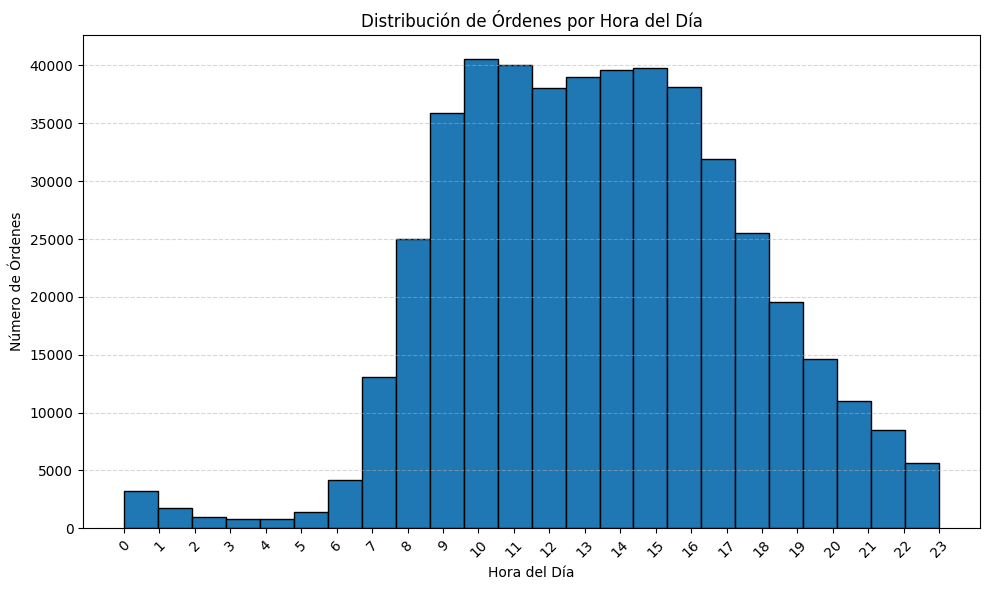

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(df_instacart_orders['order_hour_of_day'], bins=24, edgecolor='black')
plt.title("Distribución de Órdenes por Hora del Día")
plt.xlabel("Hora del Día")
plt.ylabel("Número de Órdenes")
plt.xticks(range(24), rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


Conclusiones: <br>
Para hacer la grafica, primero tuve que agrupar datos de las columnas "order_hour_of_day" y "order_id" mediante groupby. Esto para tener el total de ordenes realizadas por hora, durante el scope de las 24hrs que tenemos en la columna "order_hour_of_day". eje(x) las horas y eje(y) la cantidad de ordenes. Utilice histograma por ser visualmente atractivo y entendible

### [A3] ¿Qué día de la semana compran víveres las personas?

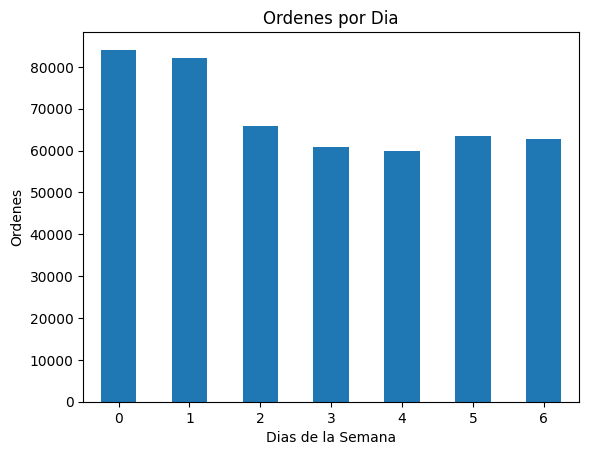

In [38]:
ordenes_por_dia = df_instacart_orders.groupby('order_dow')['order_id'].count()
ordenes_por_dia = ordenes_por_dia.sort_index()

ordenes_por_dia.plot(
    title= "Ordenes por Dia",
    kind= 'bar',
    x= 'order_dow',
    y= 'order_id',
    xlabel= 'Dias de la Semana',
    ylabel= 'Ordenes',
    rot= 0
)

plt.show()

Conclusiones: <br>
Para hacer la grafica, primero tuve que agrupar datos de las columnas "order_dow" y "order_id" mediante groupby. Esto para tener el total de ordenes realizadas por dia, durante el scope de las 24hrs que tenemos en la columna "order_hour_of_day". eje(x) las horas y eje(y) la cantidad de ordenes. Utilice grafico de barras por ser visualmente atractivo y entendible

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

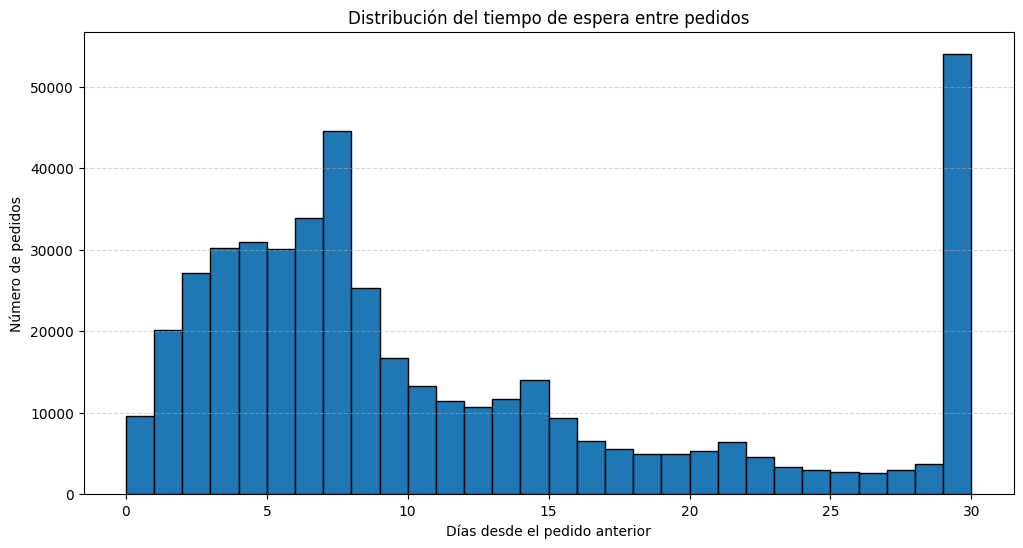

In [39]:
plt.figure(figsize=(12, 6))
plt.hist(df_instacart_orders['days_since_prior_order'], bins=30, edgecolor='black')
plt.title('Distribución del tiempo de espera entre pedidos')
plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Número de pedidos')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Conclusiones: <br>
odemos ver una clara diferencia entre las personas que muy activamente estan comprando, los que se acercan a los 0 dias desde su ultima compra, a los que tienen 30 dias desde su ultima compra. Existen una leve tendencia a la alza entre los dias 0 a 8. Despues notamos como la grafica tiende a la baja, hasta su dia 30. <br>
Esto podria significar que, los cliente que compran a traves de instacart, o tienden a comprar muy recurrente, o tardan los 30 dias para volver a comprar.

# [B] Intermedio

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
miercoles = df_instacart_orders[df_instacart_orders['order_dow'] == 3] 
miercoles_horas = miercoles['order_hour_of_day'].value_counts()

In [41]:
sabado = df_instacart_orders[df_instacart_orders['order_dow'] == 6]
sabado_horas = sabado['order_hour_of_day'].value_counts()

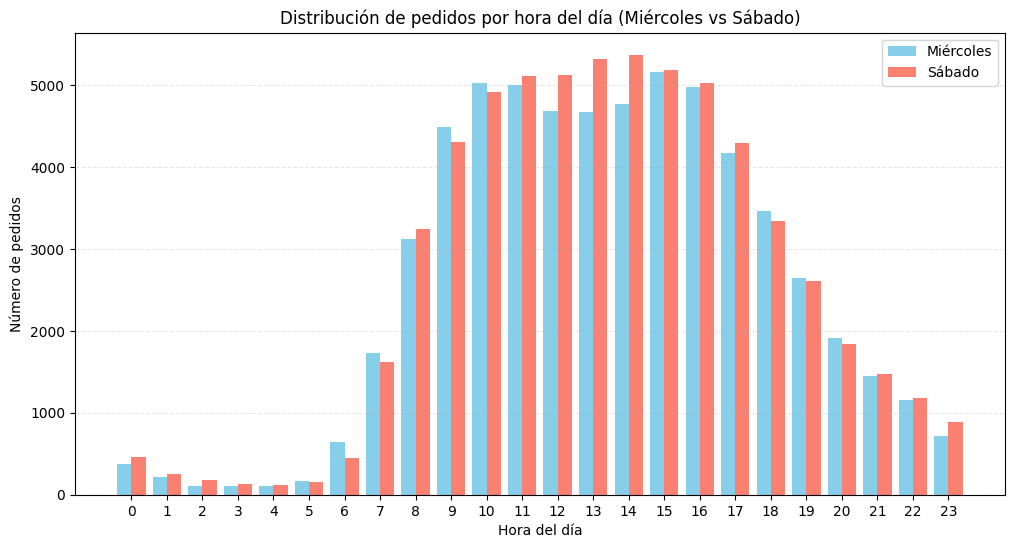

In [42]:
plt.figure(figsize=(12,6))
plt.bar(miercoles_horas.index - 0.2, miercoles_horas.values, width=0.4, label='Miércoles', color='skyblue')
plt.bar(sabado_horas.index + 0.2, sabado_horas.values, width=0.4, label='Sábado', color='salmon')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.title('Distribución de pedidos por hora del día (Miércoles vs Sábado)')
plt.xticks(range(24))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

Conclusiones: <br>
Para el histograma final, haciendo la comparativa entre los pedidos por hora entre el miercoles vs el sabado, podemos ver bastante similitud respecto a las horas. Analizando por hora, podemos ver un pico entre las 10hrs - 16hrs para ambos dias. Tanto los puntos critos como los momentos de pocos pedidos son bastante similares para ambos dias.  

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

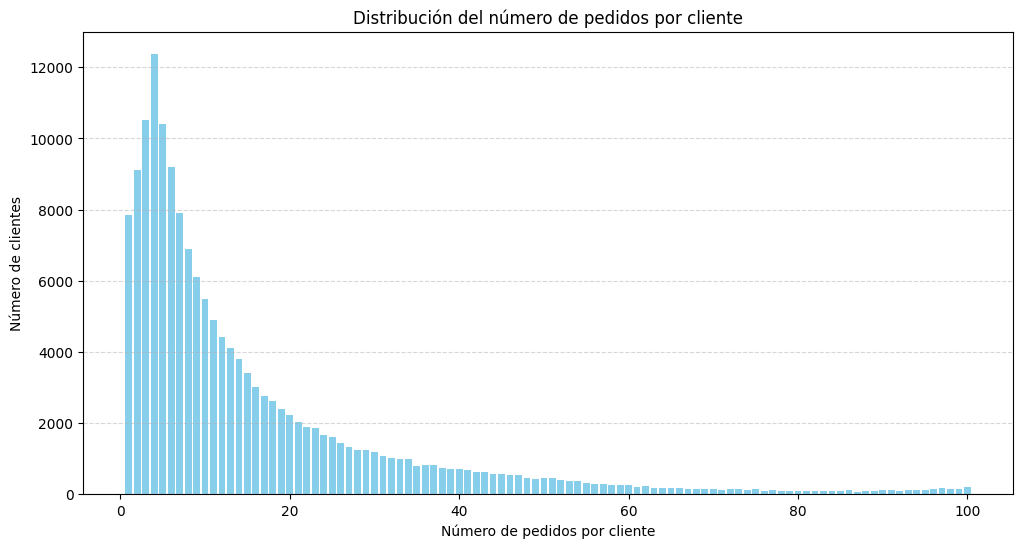

In [43]:
pedidos_por_usuario = df_instacart_orders.groupby('user_id')['order_number'].max()
distribucion = pedidos_por_usuario.value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.bar(distribucion.index, distribucion.values, color='skyblue')
plt.xlabel('Número de pedidos por cliente')
plt.ylabel('Número de clientes')
plt.title('Distribución del número de pedidos por cliente')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Conclusiones: <br>
Podemos observar una alta frecuencia desde el pedido 1 al 4. A partir de ahi la curva de la grafica tiende a decrecer, hasta tocar numero de pedidos bastante pocos, y mantenerse asi hasta el final de la grafica. Esto se podria interpretar a que, un numero pequeno de clientes tiende a hacer grandes compras. Mientras que, los picos mas grandes son de cliente realizando pedidos de 1 a 4.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [44]:
# Contar cuántas veces aparece cada product_id
productos_populares = df_order_products['product_id'].value_counts().head(20)

In [45]:
# Convertir el series a Dataframe
productos_populares = productos_populares.reset_index()
productos_populares.columns = ['product_id', 'num_pedidos']

In [46]:
# Unir mediante la columna "product_id" los dataframes order_products y products
productos_con_nombre = pd.merge(productos_populares, df_products[['product_id', 'product_name']], on='product_id')
productos_con_nombre = productos_con_nombre[['product_id', 'product_name', 'num_pedidos']]

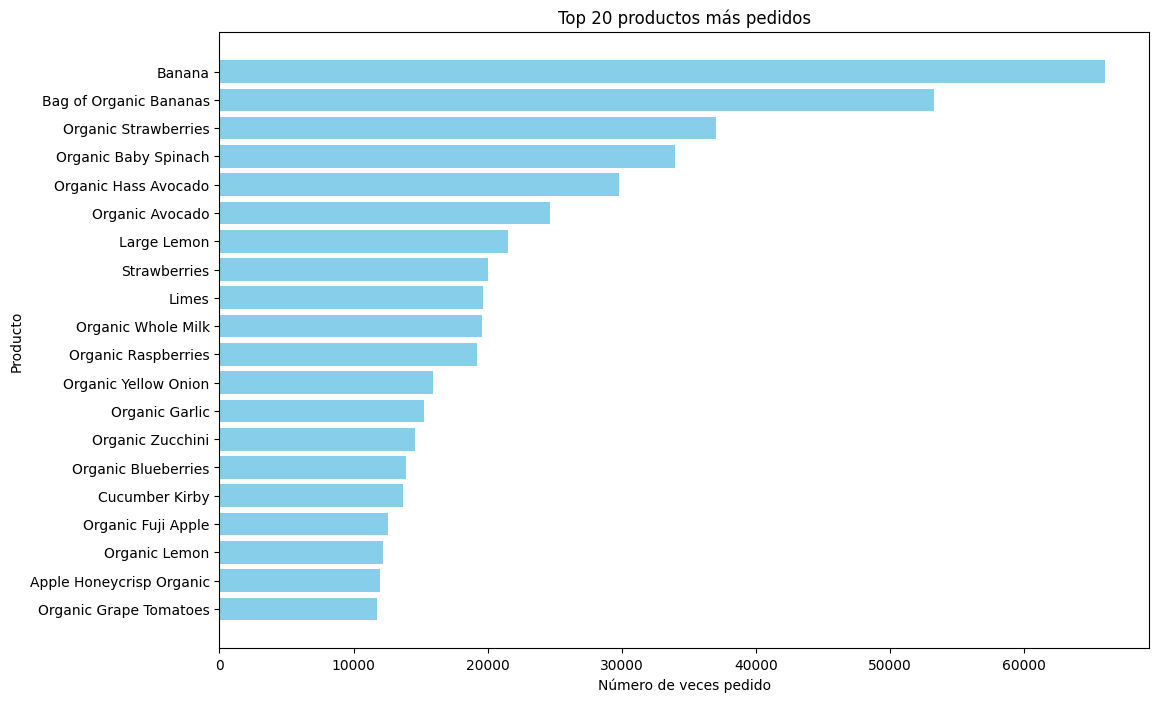

In [47]:
plt.figure(figsize=(12, 8))
plt.barh(productos_con_nombre['product_name'], productos_con_nombre['num_pedidos'], color='skyblue')
plt.xlabel('Número de veces pedido')
plt.ylabel('Producto')
plt.title('Top 20 productos más pedidos')
plt.gca().invert_yaxis()
plt.show()

Conclusiones <br>
Para esta parte, tuve que unir el product_id y el product_name del dataset "product" con el dataset "instacart_orders", esto con la finalidad de poder sacar una grafica con el top 20 productos mas pedidos. Observando como "Banana" y "Bag of organic bananas" son los que superan los 40mil pedidos. A partir de los 20mil pedidos en delante se concentran los 11 productos mas solicitados. 

# [C] Difícil

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [48]:
articulos_por_pedido = df_order_products.groupby('order_id')['product_id'].count()

In [49]:
print(articulos_por_pedido.describe())

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


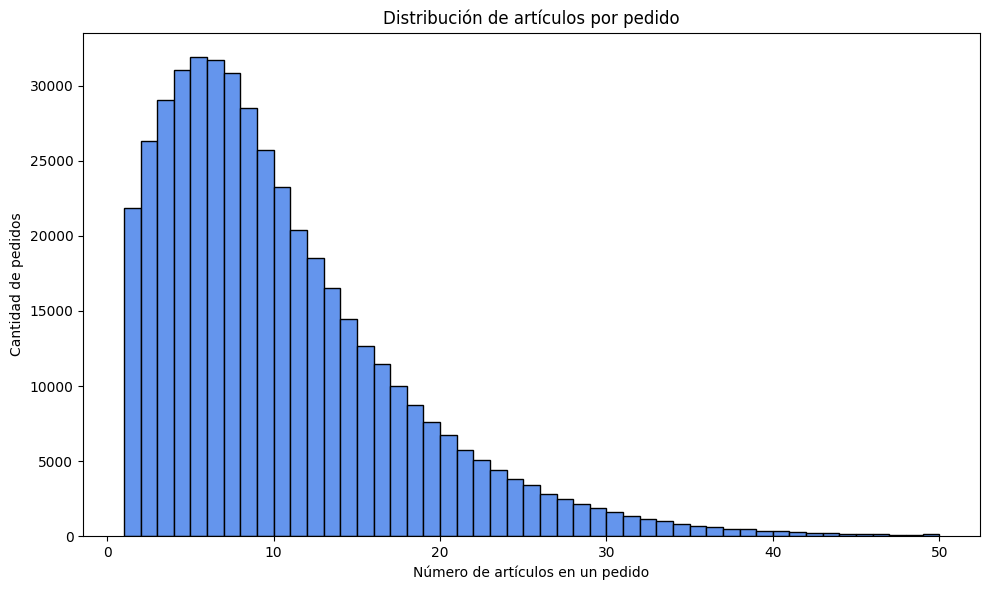

In [50]:
plt.figure(figsize=(10,6))
plt.hist(articulos_por_pedido, bins=range(1, 51), color='cornflowerblue', edgecolor='black')
plt.title('Distribución de artículos por pedido')
plt.xlabel('Número de artículos en un pedido')
plt.ylabel('Cantidad de pedidos')
plt.tight_layout()
plt.show()

Conclusiones <br>
Dada la tendencia en la grafica, podemos apreciar que el punto maximo se encuentra entre los primeros 5 pedidos. A partir de ahi, la curva de pedidos tiende a bajar de manera exponencial, hasta mantenerse en puntos minimos desde los 40 pedidos. Esto puede ser interpretado en una clara diferencia entre los clientes que compran en su gran mayoria hasta 5 articulos, y los que agregan mas de 5 en su carrito. 


### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [51]:
# Filtrar por productos reordenados
productos_populares_reordenados = df_order_products[df_order_products['reordered'] == 1]

In [52]:
# Contar cuántas veces aparece cada product_id
productos_populares_reordenados = productos_populares_reordenados['product_id'].value_counts().head(20)

In [53]:
# Convertir el series a Dataframe
productos_populares_reordenados = productos_populares_reordenados.reset_index()
productos_populares_reordenados.columns = ['product_id', 'num_reorders']

In [54]:
# Hacer la union
top_productos_populares_reordenados = pd.merge(productos_populares_reordenados, df_products[['product_id', 'product_name']], on='product_id')

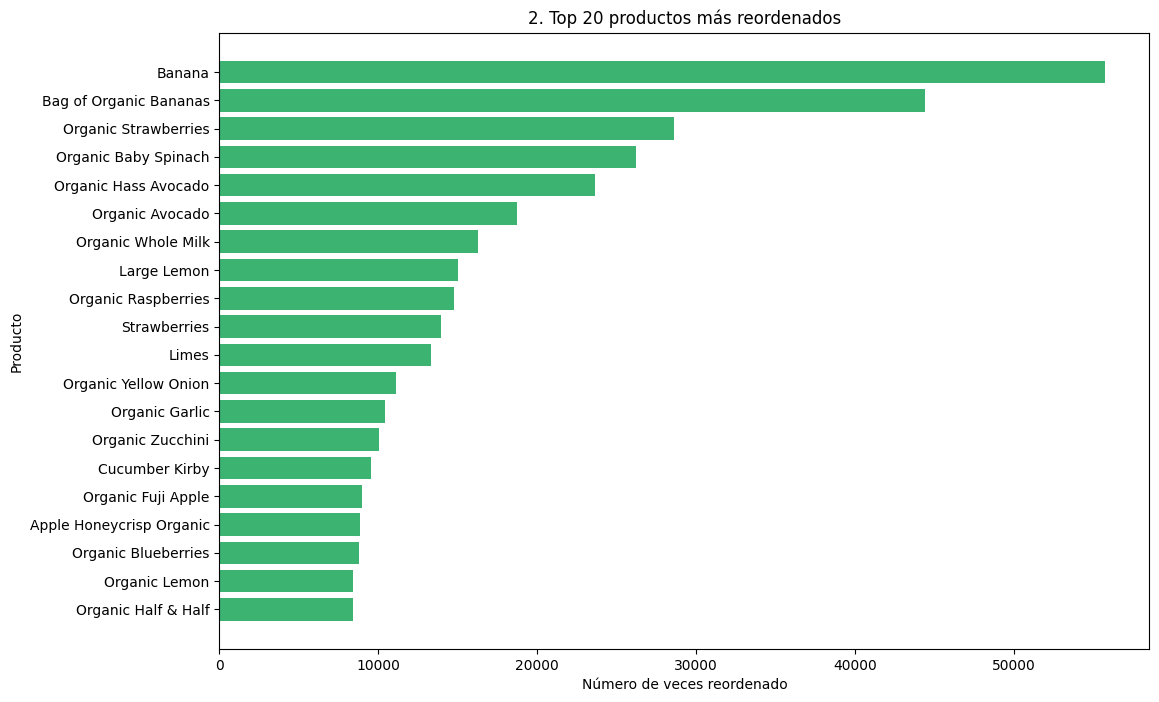

In [55]:
plt.figure(figsize=(12, 8))
plt.barh(top_productos_populares_reordenados['product_name'], top_productos_populares_reordenados['num_reorders'], color='mediumseagreen')
plt.title('2. Top 20 productos más reordenados')
plt.xlabel('Número de veces reordenado')
plt.ylabel('Producto')
plt.gca().invert_yaxis()
plt.show()

Conclusiones <br>
Con base en la grafica, son productos que los clientes tienen alta fidelidad. Podemos mencionar casos puntuales de repeticion en la misma posicion que la grafica "top 20 productos mas pedidos", como lo son (Banana, Bag of Organic Bananas, Organic Strawberries, Organic Baby Spinach, Organic Hass Avocado and Organic Avocado), que son de los productos que mantienen su posicion, como los favoritos para ordenar y reordenar por los clientes. 

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [56]:
# Calcular tasa de repetición por producto
total_pedidos = df_order_products.groupby('product_id').size()
total_reorders = df_order_products.groupby('product_id')['reordered'].sum()
tasa_reorden_producto = (total_reorders / total_pedidos).reset_index(name='tasa_reorden')

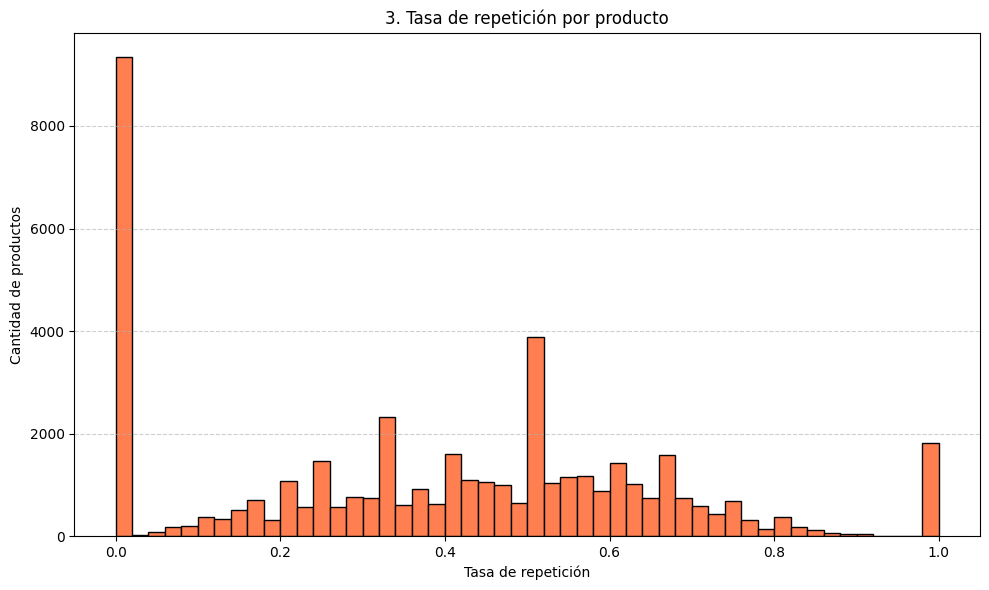

In [57]:
plt.figure(figsize=(10, 6))
plt.hist(tasa_reorden_producto['tasa_reorden'], bins=50, color='coral', edgecolor='black')
plt.title('3. Tasa de repetición por producto')
plt.xlabel('Tasa de repetición')
plt.ylabel('Cantidad de productos')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Conclusiones <br>
Para este caso, se calculo la tasa del reordenamiento por producto. Lo que se podria decir es, que aunque muchos pedidos se piden solamente una vez, hay una cantidad  pequena de productos con una tasa de reorden muy alta. Se ve una clara tendencia de los clientes a no repetir. 

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [58]:
# Unir order_products con orders para obtener user_id
df_merged = pd.merge(df_order_products, df_instacart_orders[['order_id', 'user_id']], on='order_id')

In [59]:
# Agrupar por usuario
user_total = df_merged.groupby('user_id')['product_id'].count()
user_reordered = df_merged.groupby('user_id')['reordered'].sum()
tasa_reorden_usuario = (user_reordered / user_total).reset_index(name='tasa_reorden')

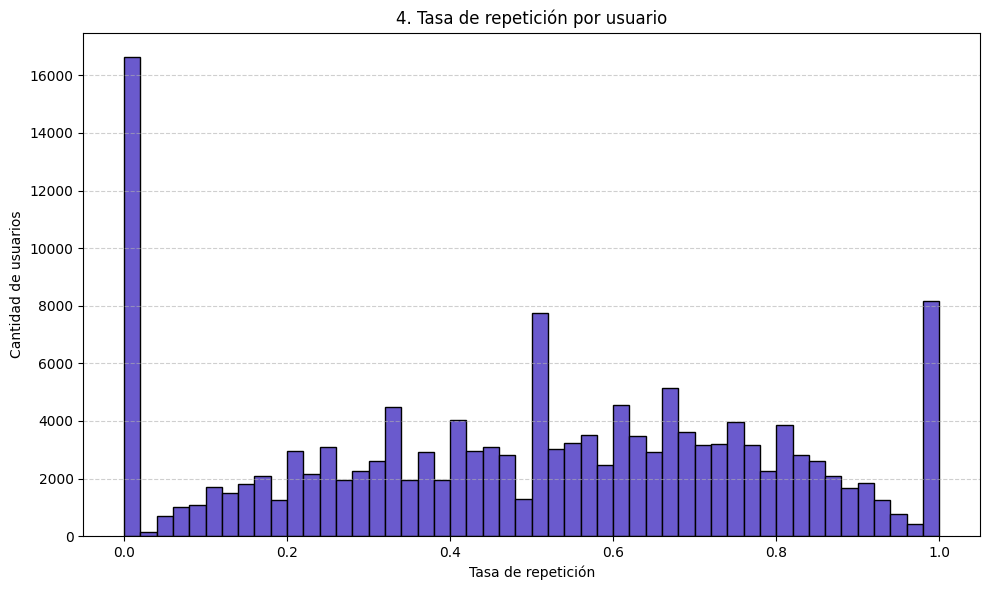

In [60]:
plt.figure(figsize=(10, 6))
plt.hist(tasa_reorden_usuario['tasa_reorden'], bins=50, color='slateblue', edgecolor='black')
plt.title('4. Tasa de repetición por usuario')
plt.xlabel('Tasa de repetición')
plt.ylabel('Cantidad de usuarios')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Conclusiones <br>
Analizando esta tasa de repeticion por parte de los clientes, podemos concluir que muchos clientes tienden a probar nuevos productos en cada pedido. Sin embargo, esta ese nicho de clientes que resultan fieles a ciertos productos. Tal vez podria ser conveniente analizar mas a fondo a estos clientes que tienden a comprar esos mismos productos como estrategia de retencion o personalizacion hacia ellos. 

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [61]:
# Filtrar donde add_to_cart_order == 1
primeros_productos = df_order_products[df_order_products['add_to_cart_order'] == 1]

In [62]:
# Contar cuántas veces cada producto fue primero
top_primero = (primeros_productos['product_id'].value_counts().head(20))

In [63]:
# Convertir el series a Dataframe
top_primero = top_primero.reset_index()
top_primero.columns = ['product_id', 'veces_primero']

In [64]:
# Agregar nombre del producto
top_primero = pd.merge(top_primero, df_products[['product_id', 'product_name']], on='product_id')

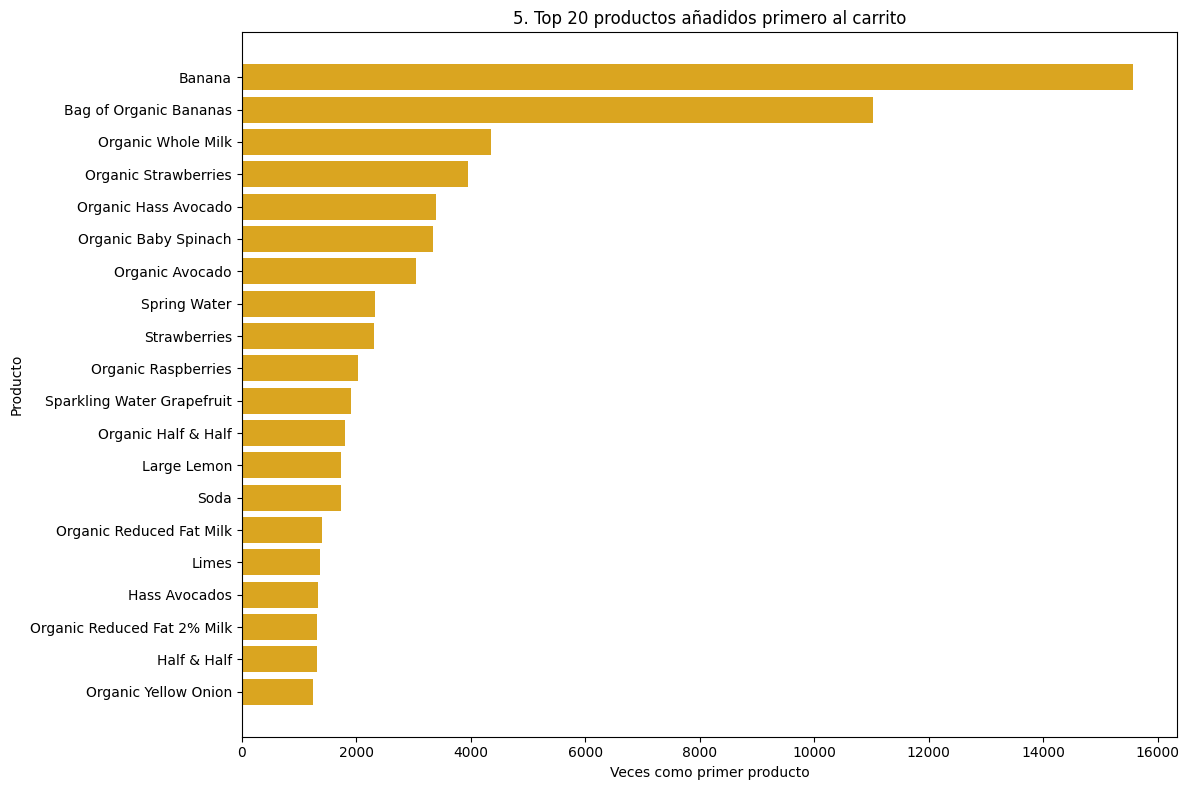

In [65]:
plt.figure(figsize=(12, 8))
plt.barh(top_primero['product_name'], top_primero['veces_primero'], color='goldenrod')
plt.title('5. Top 20 productos añadidos primero al carrito')
plt.xlabel('Veces como primer producto')
plt.ylabel('Producto')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Conclusiones <br>
La lectura que se le podria dar a esta grafica es, que los clientes que tienden a comprar (Banana and Bag or Organic Bananas), suelen ser esos que vuelven a comprar, y anaden primero a su lista del carrito. Tambien supone que, los primeros productos del carrito tienden a ser los favoritos por parte de los clientes. <br>
Pudiera ser que, como estrategia de la app, esos productos sean los que se encuentran mas visibles para que sean anadidos al carrito al momento de comprar los productos.

## Conclusion general del proyecto:

Este proyecto proporcionó una inmersión profunda en los patrones de comportamiento del consumidor en la plataforma Instacart. Al analizar los cinco grandes conjuntos de datos (orders, products, order_products, aisles, y departments), logramos navegar a los datos del mundo real para extraer conclusiones valiosas y accionables. <br>
<br>
Etapa de Preprocesamiento: Fundamentos del Análisis <br>
<br>
La etapa de limpieza de datos fue fundamental y reveló desafíos significativos. El primer paso crucial fue identificar el separador de datos correcto (punto y coma en lugar de coma). El manejo de valores duplicados fue esclarecedor: encontramos 15 duplicados exactos en la tabla orders, todos agrupados anómalamente el miércoles a las 2 a.m., los cuales fueron eliminados. <br>
<br>
- Nombres de Productos: Los 1,258 productos sin nombre (product_name) no eran aleatorios; todos pertenecían al pasillo 100 y al departamento 21 (identificados como "missing" o "unknown"). Se imputaron correctamente como "Unknown" para mantener la integridad de los registros.<br>
- Días desde Pedido Anterior: Los 28,817 valores ausentes en days_since_prior_order se correlacionaron perfectamente con los pedidos donde order_number era 1. Esto confirmó que no eran errores, sino clientes nuevos realizando su primera compra, un dato vital en sí mismo. <br>
- Orden del Carrito: Los 836 valores ausentes en add_to_cart_order se asociaron con pedidos excepcionalmente grandes (más de 64 artículos, el máximo observado). Se imputaron con un valor atípico (999) para su manejo. <br>
<br>

Etapa de Análisis Exploratorio: Descubriendo Patrones Clave <br>
<br>
Una vez limpios los datos, el análisis reveló patrones claros sobre cuándo y cómo compran los clientes: <br>
<br>
- Horarios Pico: La actividad de pedidos se concentra fuertemente entre las 10:00 y las 16:00 horas. Esta tendencia se mantuvo constante incluso al comparar días de alta demanda (como el sábado) con días de menor demanda (como el miércoles). <br>
- Frecuencia de Compra: Existe una fuerte bimodalidad en la frecuencia de los pedidos (A4). Se identifican dos grupos principales de clientes: un pico masivo a los 7 días (compradores semanales) y otro pico muy significativo a los 30 días (compradores mensuales). <br>
- Tamaño del Pedido y Lealtad del Cliente: La mayoría de los clientes realizan pocos pedidos (1-4) (B2) y compran pocos artículos por pedido (el pico está en 5 artículos) (C1). Sin embargo, existe una "larga cola" de clientes altamente recurrentes y pedidos mucho más grandes. <br>
- Comportamiento de Reorden: El análisis de reorden (C3, C4) mostró una polarización: la mayoría de los productos tienen tasas bajas de reorden (C3), y muchos usuarios también tienen tasas bajas (prefieren explorar productos nuevos). No obstante, existe un segmento de usuarios muy leales que repiten casi todos sus productos en cada compra (C4). <br>
- Conclusión Global: El Producto "Ancla" y Segmentación de Clientes <br>
<br>

El hallazgo más consistente en todo el análisis fue la dominancia de productos específicos. "Banana" y "Bag of Organic Bananas" no solo fueron los productos más comprados (B3), sino también los más reordenados (C2) y, crucialmente, los más frecuentemente añadidos primero al carrito (C5). <br>
Esto sugiere que estos productos (junto con otros orgánicos frescos como fresas y aguacates) actúan como "productos ancla": artículos de primera intención que inician el proceso de compra. <br>
En resumen, el análisis de estos cinco datasets nos permitió perfilar distintos tipos de clientes (semanales vs. mensuales; exploradores vs. leales; compras pequeñas vs. grandes). Para Instacart, esto representa una oportunidad estratégica: <br>
<br>

- Optimización de la Interfaz: Destacar los "productos ancla" (como plátanos) al inicio de la sesión del usuario podría reducir la fricción y aumentar la conversión del carrito. <br>
- Marketing Personalizado: Se puede segmentar a los usuarios. A los "exploradores" (tasa de reorden baja) se les pueden ofrecer descuentos en productos nuevos, mientras que a los "leales" (tasa de reorden alta) se les pueden ofrecer funciones de "reorden rápida" o suscripciones para sus productos favoritos.

